In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 신경망 학습
---
**학습**이란 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다.  
신경망이 학습할 수 있도록 해주는 **지표**인 손실 함수를 소개한다. 이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다.

## 4.1 데이터에서 학습
데이터에서 학습한다는 것은 가중치 매개변수의 값을 데이터를 보고 자동으로 결정한다는 뜻이다.

### 4.1.1 데이터 주도 학습
기계학습은 데이터가 생명이다. 데이터에서 답을 찾고 데이터에서 패턴을 발견하고 데이터로 이야기를 만드는, 그것이 바로 기계학습이다.  
그런 방법의 하나로, 이미지에서 **특징**<sup>feature</sup>을 추출하고 그 특징의 패턴을 기계학습 기술로 학습하는 방법이 있다.  
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용한다.  
이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있다.

하지만 신경망은 이미지를 '있는 그대로' 학습한다.

**※ NOTE**  
딥러닝을 **종단간 기계학습**<sup>end-to-end machine learning</sup>이라고 한다.  
종단간은 '처음부터 끝까지' 라는 의미로, 데이터(입력)에서 목표한 결과(출력)을 사람의 개입 없이 얻는다는 뜻이다.

### 4.1.2 훈련 데이터와 시험 데이터
기계학습 문제는 데이터를 **훈련 데이터**<sup>training data</sup>와 **시험 데이터**<sup>test data</sup>로 나눠 학습과 실험을 수행하는 것이 일반적이다.  
우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾는다. 그런 다음 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가하는 것이다.  
이를 구분하는 이유는 범용적으로 사용할 수 있는 모델을 원하기 때문이다.  
그래서 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없다. 한 데이터셋에만 지나치게 최적화된 상태를 **오버피팅**<sup>overfitting</sup> 이라고 한다.

## 4.2 손실 함수
신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현한다. 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것이다.  
최적의 매개변수를 탐색하는데 사용되는 지표를 **손실 함수**<sup>loss function</sup>라고 한다.  
일반적으로 손실 함수는 평균 제곱 오차와 교차 엔트로피 오차를 사용한다.

### 4.2.1 평균 제곱 오차
가장 많이 쓰이는 손실 함수는 **평균 제곱 오차**<sup>mean squared error, MSE</sup>이다.

**[식 4.1]**  
$
\begin{align}
E = 
\frac{1}{n} \sum_{i=1}^n(y_i - t_i)^2
\end{align}
$

- $y_i$는 신경망의 출력(신경망이 추정한 값)
- $t_i$는 정답 레이블
- $n$은 데이터의 차원 수

In [ ]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

신경망의 출력 y 는 소프트맥스 함수의 출력이다.  
정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기한다. 이는 **원-핫 인코딩** 이라 한다.

In [11]:
def mean_squared_error(y, t):
    return np.sum((y-t)**2) / t.size

In [18]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 첫 번째 결과
display(mean_squared_error(np.array(y),np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

# 두 번째 결과
display(mean_squared_error(np.array(y),np.array(t)))

0.019500000000000007

0.11950000000000001

위의 평균 제곱 오차의 결과는 첫 번째 추정 결과가 (오차가 더 작으므로) 정답에 더 가깝다는 것을 알 수 있다.

### 4.2.2 교차 엔트로피 오차
또 다른 손실 함수로서 **교차 엔트로피 오차**<sup>cross entropy error, CEE</sup>도 자주 이용한다.

**[식 4.2]**  
$
\begin{align}
E = 
-\sum_{i=1}^n t_i \log y_i
\end{align}
$

- $\log$는 밑이 $e$인 자연로그 $\log_e$
- $y_i$는 신경망의 출력
- $t_i$는 정답 레이블

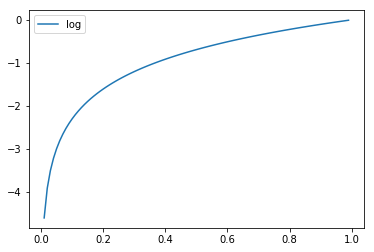

In [15]:
x = np.arange(0.01, 1.0, 0.01)
y = np.log(x)

plt.plot(x, y, label="log")
plt.legend()

plt.show()

In [17]:
def cross_entropy_error(y, t):
    # np.log() 함수에 0을 입력하면 마이너스 무한대가 되므로 보정한다.
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [19]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]

# 첫 번째 결과
display(cross_entropy_error(np.array(y),np.array(t)))

y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

# 두 번째 결과
display(cross_entropy_error(np.array(y),np.array(t)))

0.510825457099338

2.302584092994546

### 4.3.3 미니배치 학습
